In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

El dataset original se puede encontrar en:

https://datos.cdmx.gob.mx/explore/dataset/carpetas-de-investigacion-pgj-de-la-ciudad-de-mexico/information/disjunctive.ao_hechos&disjunctive.delito&dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6ImNhcnBldGFzLWRlLWludmVzdGlnYWNpb24tcGdqLWRlLWxhLWNpdWRhZC1kZS1tZXhpY28iLCJvcHRpb25zIjp7ImRpc2p1bmN0aXZlLmFvX2hlY2hvcyI6dHJ1ZSwiZGlzanVuY3RpdmUuZGVsaXRvIjp0cnVlfX0sImNoYXJ0cyI6W3siYWxpZ25Nb250aCI6dHJ1ZSwidHlwZSI6ImNvbHVtbiIsImZ1bmMiOiJDT1VOVCIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6IiM2NmMyYTUifV0sInhBeGlzIjoiYW9faGVjaG9zIiwibWF4cG9pbnRzIjo1MCwic29ydCI6IiJ9XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=4,9.95262,-100.46133

In [2]:
data = pd.read_csv('C:/Users/rober/Downloads/carpetas-de-investigacion-pgj-de-la-ciudad-de-mexico.csv')
data.head()

ao_hechos  mes_hechos         fecha_hechos  \
0     2017.0  Septiembre  2017-09-30 23:00:00   
1     2017.0  Septiembre  2017-09-30 22:00:00   
2     2017.0      Agosto  2017-08-31 11:43:00   
3     2017.0  Septiembre  2017-09-30 21:15:00   
4     2017.0  Septiembre  2017-09-12 12:00:00   

                            delito              categoria_delito  \
0     ROBO A NEGOCIO CON VIOLENCIA  ROBO A NEGOCIO CON VIOLENCIA   
1  DAÑO EN PROPIEDAD AJENA CULPOSA        DELITO DE BAJO IMPACTO   
2                  ROBO DE OBJETOS        DELITO DE BAJO IMPACTO   
3      HOMICIDIO POR ARMA DE FUEGO              HOMICIDIO DOLOSO   
4               ABUSO DE CONFIANZA        DELITO DE BAJO IMPACTO   

                             fiscalia agencia unidad_investigacion  \
0         INVESTIGACIÓN EN CUAUHTEMOC   CUH-2               UI-2CD   
1  INVESTIGACIÓN EN GUSTAVO A. MADERO   GAM-2               UI-2CD   
2         INVESTIGACIÓN EN IZTAPALAPA   IZP-4               UI-2SD   
3            INVESTIGACIÓN EN TLAHUAC   TLH-1               UI-2CD   
4         INVESTIGACIÓN EN IZTAPALAPA   IZP-4               UI-2SD   

    alcaldia_hechos                      colonia_hechos  ao_inicio mes_inicio  \
0        CUAUHTEMOC                              JUÁREZ       2017    Octubre   
1  GUSTAVO A MADERO  RESIDENCIAL ACUEDUCTO DE GUADALUPE       2017    Octubre   
2        IZTAPALAPA         LEYES DE REFORMA 3A SECCIÓN       2017    Octubre   
3           TLAHUAC                           LA HABANA       2017    Octubre   
4        IZTAPALAPA                      REAL DEL MORAL       2017    Octubre   

          fecha_inicio             calle_hechos           calle_hechos2  \
0  2017-10-01 00:12:26    VERSALLES Y  MARSELLA                     NaN   
1  2017-10-01 00:40:28                   BRISAS           DESEMBOCADURA   
2  2017-10-01 00:47:11        GUERRA DE REFORMA  BATALLA DE CALPULALPAN   
3  2017-10-01 00:47:53           MIGUEL HIDALGO                     NaN   
4  2017-10-01 01:03:50  FERROCARRIL DE RIO FRIO                     NaN   

    longitud    latitud                      geopoint  
0 -99.155905  19.426970   19.426970385,-99.1559051339  
1 -99.147345  19.525971  19.5259710139,-99.1473450714  
2 -99.068851  19.382600  19.3825998321,-99.0688509212  
3 -98.996337  19.267774  19.2677742376,-98.9963370068  
4 -99.080072  19.390447  19.3904466893,-99.0800721114

### ¿Qué pruebas identificarías para asegurar la calidad de estos datos? No es necesario hacerlas. Sólo describe la prueba y qué te dice cada una.

1. Datos faltantes: para ver cuántos son, dónde se concentran e intentar econtrar una explicación.
2. Prueba de Grubbs: para encontrar posibles valores atípicos (univariados)

### 2) ¿Cuántos delitos registrados hay en la tabla? ¿Qué rango de tiempo consideran los datos?

In [3]:
print('Total registros:', str(data.shape[0]))

Total registros: 1030202


In [4]:
na_values = ['nan', 'NA NA', 'NA 00:00:00', '0000-00-00 00:00:00']
filter = ~data.fecha_hechos.astype('str').isin(na_values)

data_clean = data[filter]
data_clean['fecha_hechos'] = pd.to_datetime(data[filter].fecha_hechos)
data_clean.sort_values('fecha_hechos')

<ipython-input-4-89fa526adf18>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['fecha_hechos'] = pd.to_datetime(data[filter].fecha_hechos)


ao_hechos  mes_hechos        fecha_hechos  \
42071      1906.0       Junio 1906-06-02 19:00:00   
416394     1915.0       Enero 1915-01-10 15:00:00   
232810     1915.0  Septiembre 1915-09-10 10:00:00   
303783     1930.0     Febrero 1930-02-16 12:00:00   
94727      1942.0     Octubre 1942-10-22 19:00:00   
...           ...         ...                 ...   
894733     2020.0       Enero 2020-12-01 23:30:00   
824657     2020.0       Enero 2020-12-01 23:40:00   
929677     2020.0       Enero 2020-12-01 23:40:00   
894175     2020.0       Enero 2020-12-01 23:40:00   
929680     2020.0       Enero 2020-12-01 23:50:00   

                                                   delito  \
42071                                  VIOLENCIA FAMILIAR   
416394                                             FRAUDE   
232810     ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA   
303783                                    ROBO DE OBJETOS   
94727                                  VIOLENCIA FAMILIAR   
...                                                   ...   
894733                                 VIOLENCIA FAMILIAR   
824657  NARCOMENUDEO POSESIÃ“N CON FINES DE VENTA, COM...   
929677     ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA   
894175                         ROBO DE ACCESORIOS DE AUTO   
929680                                      ENCUBRIMIENTO   

                                         categoria_delito  \
42071                              DELITO DE BAJO IMPACTO   
416394                             DELITO DE BAJO IMPACTO   
232810  ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...   
303783                             DELITO DE BAJO IMPACTO   
94727                              DELITO DE BAJO IMPACTO   
...                                                   ...   
894733                             DELITO DE BAJO IMPACTO   
824657                             DELITO DE BAJO IMPACTO   
929677  ROBO A TRANSEUNTE EN VÃA PÃšBLICA CON Y SIN V...   
894175                             DELITO DE BAJO IMPACTO   
929680                             DELITO DE BAJO IMPACTO   

                                                 fiscalia    agencia  \
42071                         INVESTIGACIÓN EN IZTAPALAPA      IZP-8   
416394                        INVESTIGACIÓN EN XOCHIMILCO       XO-1   
232810                        INVESTIGACIÓN EN CUAUHTEMOC  URI-CUH-2   
303783                 INVESTIGACIÓN EN GUSTAVO A. MADERO      GAM-4   
94727                           INVESTIGACIÓN EN COYOACÁN      COY-1   
...                                                   ...        ...   
894733  FISCALÃA DE INVESTIGACIÃ“N TERRITORIAL EN IZT...      IZC-2   
824657  FISCALÃA DE INVESTIGACIÃ“N DEL DELITO DE NARC...        ACD   
929677  FISCALÃA DE INVESTIGACIÃ“N TERRITORIAL EN GUS...      GAM-2   
894175  FISCALÃA DE INVESTIGACIÃ“N TERRITORIAL EN CUA...      CUH-2   
929680  FISCALÃA DE INVESTIGACIÃ“N TERRITORIAL EN GUS...      GAM-2   

       unidad_investigacion   alcaldia_hechos                  colonia_hechos  \
42071                UI-1CD        IZTAPALAPA               EL MOLINO TEZONCO   
416394               UI-3CD        XOCHIMILCO      BOSQUE RESIDENCIAL DEL SUR   
232810               UI-1SD        CUAUHTEMOC                          CENTRO   
303783               UI-3CD  GUSTAVO A MADERO    AMPLIACIÓN GABRIEL HERNÁNDEZ   
94727                UI-1CD          COYOACAN       PEDREGAL DE SANTO DOMINGO   
...                     ...               ...                             ...   
894733               UI-2SD         IZTACALCO             AGRÃCOLA PANTITLAN   
824657               UI-2CD        IZTAPALAPA  DESARROLLO URBANO QUETZALCOATL   
929677               UI-2CD  GUSTAVO A MADERO            SAN FELIPE DE JESÃšS   
894175               UI-2CD        CUAUHTEMOC                        GUERRERO   
929680               UI-2CD  GUSTAVO A MADERO   SAN JUAN Y GUADALUPE TICOMÃN   

        ao_inicio mes_inicio         fecha_inicio  \
42071        2

In [5]:
# Para ver realmente qué meses hay del 2020.

data_clean[data_clean['ao_hechos']==2020].mes_hechos.unique()

array(['Mayo', 'Febrero', 'Abril', 'Marzo', 'Enero', 'Junio'],
      dtype=object)

In [6]:
data_clean[(data_clean['ao_hechos']==2020) & (data_clean['mes_hechos']=='Junio')]

ao_hechos mes_hechos        fecha_hechos  \
760446      2020.0      Junio 2020-06-01 02:40:00   
760450      2020.0      Junio 2020-06-01 03:15:00   
760452      2020.0      Junio 2020-06-01 02:30:00   
760454      2020.0      Junio 2020-06-01 06:10:00   
760456      2020.0      Junio 2020-06-01 06:40:00   
...            ...        ...                 ...   
1011986     2020.0      Junio 2020-06-30 06:00:00   
1011987     2020.0      Junio 2020-06-30 15:45:00   
1011989     2020.0      Junio 2020-06-30 20:10:00   
1011990     2020.0      Junio 2020-06-30 22:30:00   
1011991     2020.0      Junio 2020-06-30 18:40:00   

                                                    delito  \
760446   HOMICIDIO CULPOSO POR TRÁNSITO VEHICULAR (ATRO...   
760450         ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO   
760452   DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO V...   
760454   HOMICIDIO CULPOSO POR TRÁNSITO VEHICULAR (COLI...   
760456   ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO ...   
...                                                    ...   
1011986                                    ROBO DE OBJETOS   
1011987                                 VIOLENCIA FAMILIAR   
1011989                           CONTAMINACIÓN O RESIDUOS   
1011990  ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS (TIE...   
1011991                                           AMENAZAS   

               categoria_delito  \
760446   DELITO DE BAJO IMPACTO   
760450   DELITO DE BAJO IMPACTO   
760452   DELITO DE BAJO IMPACTO   
760454   DELITO DE BAJO IMPACTO   
760456   DELITO DE BAJO IMPACTO   
...                         ...   
1011986  DELITO DE BAJO IMPACTO   
1011987  DELITO DE BAJO IMPACTO   
1011989  DELITO DE BAJO IMPACTO   
1011990  DELITO DE BAJO IMPACTO   
1011991  DELITO DE BAJO IMPACTO   

                                                  fiscalia agencia  \
760446   FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN GUSTA...   GAM-6   
760450   FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN COYOACÁN   COY-2   
760452   FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN GUSTA...   GAM-2   
760454   FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN COYOACÁN   COY-2   
760456   FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN VENUS...    VC-3   
...                                                    ...     ...   
1011986                   UNIDAD DE RECEPCIÓN POR INTERNET   CEN-1   
1011987  FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN ALVAR...    AO-4   
1011989  FISCALÍA DE INVESTIGACIÓN EN DELITOS AMBIENTAL...       A   
1011990  FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN GUSTA...   GAM-4   
1011991  FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN CUAUH...   CUH-2   

                  unidad_investigacion      alcaldia_hechos  \
760446                          UI-1CD     GUSTAVO A MADERO   
760450                          UI-1CD             COYOACAN   
760452                          UI-1CD         AZCAPOTZALCO   
760454                          UI-1CD             COYOACAN   
760456                          UI-2CD  VENUSTIANO CARRANZA   
...                                ...                  ...   
1011986  Unidad de Investigación 1 S/D            IZTACALCO   
1011987                         UI-1SD       ALVARO OBREGON   
1011989           1 CON DETENIDO 1 C/D           IZTAPALAPA   
1011990                         UI-1CD     GUSTAVO A MADERO   
1011991                         UI-1SD           CUAUHTEMOC   

                                  colonia_hechos  ao_inicio mes_inicio  \
760446                                INDUSTRIAL       2020      Junio   
760450                 CULHUACÁN CTM SECCIÓN VII       2020      Junio   
760452                        INDUSTRIAL VALLEJO       2020      Junio   
760454   UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO       2020      Junio   
760456                  AMPLIACIÓN PENITENCIARIA       2020      Junio   
...                                          ...        ...        ...   
1011986                                SAN PEDRO       2020      Junio   
1011987         

Los fechas del set de datos (no faltantes) van **del 2 Junio 1906 al 30 Junio 2020** 

Nota: Hay un error en la medición. _fecha_hechos_ a veces está en formato YYYY-MM-DD, y a veces en formato YYYY-DD-MM. 

### 3) ¿Cómo se distribuye el número de delitos en la CDMX? ¿Cuáles son los 5 delitos más frecuentes?

In [7]:
# Visualizar sólo los n delitos más comunes, para mmayor claridad. Los demás serán agrupados en "Otros"

top=15
freq=data['delito'].value_counts()[:top]
freq['OTROS']=data['delito'].value_counts()[top:].sum()
freq

VIOLENCIA FAMILIAR                                                       96156
ROBO A NEGOCIO SIN VIOLENCIA                                             63779
ROBO DE OBJETOS                                                          62880
FRAUDE                                                                   59749
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA                           53181
AMENAZAS                                                                 51095
DENUNCIA DE HECHOS                                                       40142
ROBO DE ACCESORIOS DE AUTO                                               31483
ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO                              29003
ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA                    27526
ROBO A CASA HABITACION SIN VIOLENCIA                                     26735
FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMENTOS DE CREDITO PUBLICO     18725
ABUSO DE CONFIANZA                                  

In [8]:
freq[:5].sum()/freq.sum()

0.3259021046357899

Los 5 delitos más frecuentes son: 
- Violencia familiar
- Robo a Negocio sin Violencia
- Robo de Objetos
- Fraude
- Robo a Transeúnte en Vía Pública Con Violencia.

Juntos, concentran el 32.6% de los delitos.

### Identifica los delitos que van a la alza y a la baja en la CDMX en el último año (ten cuidado con los delitos con pocas ocurrencias).

In [9]:
# Como fecha_hechos no es confiable, se filtrará según mes_hechos.
meses=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']

data_clean['Ene_Jun'] = (data_clean['mes_hechos'].isin(meses)) & (data_clean['ao_hechos'].isin([2019, 2020]))
                                                                  
aux=data_clean[data_clean['Ene_Jun']]  # Los datos entre Enero y Junio, de 2019 y 2020.

delitos_cum=pd.crosstab(aux.delito, aux.ao_hechos, margins=True)
delitos_cum

<ipython-input-9-6804a4d5ef51>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Ene_Jun'] = (data_clean['mes_hechos'].isin(meses)) & (data_clean['ao_hechos'].isin([2019, 2020]))


ao_hechos                                           2019.0  2020.0     All
delito                                                                    
ABORTO                                                  72      47     119
ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PU...    1006     941    1947
ABUSO DE CONFIANZA                                    1754    1192    2946
ABUSO SEXUAL                                          2041    1366    3407
ACOSO SEXUAL                                           468     435     903
...                                                    ...     ...     ...
VIOLACION EQUIPARADA Y ROBO DE VEHICULO                  1       2       3
VIOLACION TUMULTUARIA                                   13      16      29
VIOLACION TUMULTUARIA EQUIPARADA POR CONOCIDO            1       0       1
VIOLENCIA FAMILIAR                                   12643   12017   24660
All                                                 123730   88468  212198

[317 rows x 3 columns]

In [10]:
print('Los cinco delitos con mayor decremento y mayor incremento en Enero a Junio 2020, a comparación del año pasado, son:')

delitos_cum['Cambio'] = (delitos_cum[2020]/delitos_cum[2019])-1
delitos_cum[(delitos_cum[2020]>50) & (delitos_cum[2019]>50)].sort_values('Cambio')

Los cinco delitos con mayor decremento y mayor incremento en Enero a Junio 2020, a comparación del año pasado, son:


ao_hechos                                           2019.0  2020.0   All  \
delito                                                                     
ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA        1669     335  2004   
ROBO A PASAJERO A BORDO DE METRO CON VIOLENCIA         223      55   278   
ROBO A TRANSEUNTE A BORDO DE TAXI PÚBLICO Y PRI...     205      52   257   
FALSEDAD ANTE AUTORIDADES                              258      71   329   
ROBO A NEGOCIO CON VIOLENCIA                          2717     901  3618   
...                                                    ...     ...   ...   
DDH FRVT                                                52      85   137   
DESOBEDIENCIA Y RESISTENCIA DE PARTICULARES            190     353   543   
DDH OTRAS MATERIAS                                      97     190   287   
DDH RELACIONADAS                                        56     145   201   
ROBO A TRANSEUNTE EN PARQUES Y MERCADOS CON VIO...      85     252   337   

ao_hechos                                             Cambio  
delito                                                        
ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA     -0.799281  
ROBO A PASAJERO A BORDO DE METRO CON VIOLENCIA     -0.753363  
ROBO A TRANSEUNTE A BORDO DE TAXI PÚBLICO Y PRI... -0.746341  
FALSEDAD ANTE AUTORIDADES                          -0.724806  
ROBO A NEGOCIO CON VIOLENCIA                       -0.668384  
...                                                      ...  
DDH FRVT                                            0.634615  
DESOBEDIENCIA Y RESISTENCIA DE PARTICULARES         0.857895  
DDH OTRAS MATERIAS                                  0.958763  
DDH RELACIONADAS                                    1.589286  
ROBO A TRANSEUNTE EN PARQUES Y MERCADOS CON VIO...  1.964706  

[107 rows x 4 columns]

### ¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos?¿Por qué crees que sea esto?

In [11]:
data_recientes = data[data['ao_hechos']>2019]

data_recientes['alcaldia_hechos'].value_counts()
#data_clean.alcaldia_hechos

IZTAPALAPA                         13956
CUAUHTEMOC                         11776
GUSTAVO A MADERO                    9600
BENITO JUAREZ                       6444
ALVARO OBREGON                      6374
                                   ...  
ALMOLOYA DE JUAREZ                     1
GENERAL HELIODORO CASTILLO             1
APETATITLAN DE ANTONIO CARVAJAL        1
TEPEJI DEL RIO DE OCAMPO               1
TLANALAPA                              1
Name: alcaldia_hechos, Length: 148, dtype: int64

El dato en bruto no es tan buen indicador. Las alcaldías con mayor número de delitos coinciden con aquellas que tienen una mayor población. Asímismo, tienen una mayor densidad poblacional.
Las "alcaldías" con menos delitos son, en realidad, municipios externos a la Ciudad de México. Por lo tanto, son muy pocos los que se llevaron a Ciudad de México para abrir carpetas de investigación.

### Dentro de cada alcaldía, cuáles son las tres colonias con más delitos

In [12]:
alcaldias_colonias={}
alcaldias=['IZTAPALAPA', 'CUAUHTEMOC', 'GUSTAVO A MADERO', 'BENITO JUAREZ', 'ALVARO OBREGON', 'COYOACAN', 'TLALPAN', 'MIGUEL HIDALGO', 'VENUSTIANO CARRANZA', 'AZCAPOTZALCO', 'IZTACALCO', 'XOCHIMILCO', 'TLAHUAC', 'LA MAGDALENA CONTRERAS', 'CUAJIMALPA DE MORELOS', 'MILPA ALTA']

for alcaldia in alcaldias:
    alcaldias_colonias[alcaldia] = data_recientes[data_recientes.alcaldia_hechos==alcaldia].colonia_hechos.value_counts()[:3].index.tolist()
    
alcaldias_colonias

{'IZTAPALAPA': ['CENTRAL DE ABASTO',
  'LOMAS DE SAN LORENZO',
  'DESARROLLO URBANO QUETZALCOATL'],
 'CUAUHTEMOC': ['CENTRO', 'DOCTORES', 'ROMA NORTE'],
 'GUSTAVO A MADERO': ['GUADALUPE TEPEYAC',
  'LINDAVISTA',
  'SAN FELIPE DE JESÚS'],
 'BENITO JUAREZ': ['DEL VALLE CENTRO', 'NARVARTE', 'PORTALES SUR'],
 'ALVARO OBREGON': ['JARDINES DEL PEDREGAL', 'SAN ANGEL', 'ZEDEC SANTA FE'],
 'COYOACAN': ['PEDREGAL DE SANTO DOMINGO',
  'PEDREGAL DE SANTA URSULA',
  'AJUSCO'],
 'TLALPAN': ['SAN ANDRÉS TOTOLTEPEC',
  'SAN MIGUEL TOPILEJO',
  'HÉROES DE PADIERNA'],
 'MIGUEL HIDALGO': ['POLANCO', 'ANAHUAC', 'TACUBAYA'],
 'VENUSTIANO CARRANZA': ['MORELOS', 'JARDÍN BALBUENA', 'MOCTEZUMA 2A SECCIÓN'],
 'AZCAPOTZALCO': ['EL ROSARIO',
  'INDUSTRIAL VALLEJO',
  'CENTRO DE AZCAPOTZALCO'],
 'IZTACALCO': ['AGRÍCOLA ORIENTAL', 'AGRÍCOLA PANTITLAN', 'GRANJAS MÉXICO'],
 'XOCHIMILCO': ['SANTA CRUZ ACALPIXCA - PUEBLO',
  'SAN GREGORIO ATLAPULCO',
  'SAN LORENZO LA CEBADA'],
 'TLAHUAC': ['DEL MAR', 'MIGUEL HIDALGO',

### ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la semana, quincenas)?

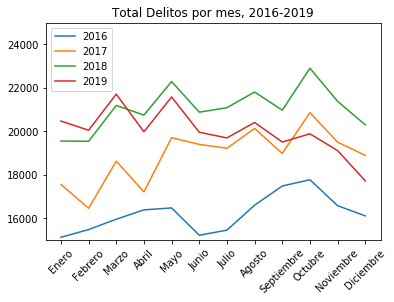

In [45]:
meses_orden = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'] 
year = [2016, 2017, 2018, 2019]
for i in year:

    aux = data[data.ao_hechos==i].groupby('mes_hechos')['delito'].count()

    plt.plot(aux[meses_orden], label=i)

    
plt.title('Total Delitos por mes, 2016-2019')
plt.legend()
plt.xticks(rotation=45)
plt.ylim([15000, 25000])
plt.show()

Entre 2016 y 2019 pareciera haber un efecto estacional en algunos meses. Alrededor de mayo y septiembre hay un incremento en el número de delitos; en cambio, en junio-julio y diciembre estos se reducen. 

La gran variedad de formatos distintos en fecha_hechos dificulta el hacer un análisis de tendencia con mayor granularidad, sin una limpieza exhaustiva.

### 8) ¿Cuales son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás.